<a href="https://colab.research.google.com/github/wanessasilqueir/SRAG-no-brasil-2021/blob/main/SRAG_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos casos de Síndrome Respiratória Aguda Grave (SRAG) no Brasil

A análise a seguir traz informações acerca dos casos de SRAG no Brasil em 2021, enquadrado como o segundo ano de pandemia do SARS-CoV-2.

Este notebook traz a proposta de entender, através dos dados, como está o cenário de SRAG no Brasil em 2021 mesmo diante do avanço da vacinação. Após o carregamento dos dados, fiz algumas considerações e criei algumas variáveis novas para auxiliar na análise. Em seguida, respondi sequencialmente alguns questionamentos elaborados com o intuito de traçar o perfil dessa condição de saúde.

Os dados foram importados do dados.gov.br e a última atualizacão provida por eles foi em 04/10/2021


####Possíveis perguntas



1. Pergunta: Qual o perfil geral dos pacientes com SRAG no Brasil?
2. Pergunta: Quais os estados brasileiros com os maiores números de casos?
3. Pergunta: Como está o cenário de evolução do doença?
4. Pergunta: Há desigualdade em relação ao gênero nos casos de SRAG?
5. Pergunta: Qual o número de internações?
6. Pergunta: Qual o diagnótico final de SRAG?
7. Pergunta: Qual o cenário de sintomas e comorbidades em relação às diferentes classificações de SRAG?
8. Pergunta: Como está os casos de SRAG em crianças até 5 anos?

####Importando o arquivo com a biblioteca Pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option("display.max_columns", 200) # ---> Ás vezes, quando você tem uma planilha com muitas colunas,
 # pode ser colocado "..." entre uma variável e outra como forma de resumir, usar esse código evita disso acontecer ;)


In [ ]:
import pandas as pd

url = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-04-10-2021.csv"

dados = pd.read_csv(url, sep=';')
dados.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,108,115,117,118,119,123,144) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,11/01/2021,2,08/01/2021,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HOSPITAL DISTRITAL MARIA JOSE BARROSO DE OLIVE...,2516640,F,18/02/1929,91,3,3091,5,4,NaN,9.0,BRASIL,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,1.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0,9.0,9.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1.0,08/01/2021,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,08/01/2021,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/01/2021,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/01/2021,2,09/01/2021,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,SAO JOSE DO RIO PRETO,354980,HOSPITAL DE BASE DE SAO JOSE DO RIO PRETO,2077396,F,14/09/1940,80,3,3080,6,1,NaN,1.0,BRASIL,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,GUAPIACU,351750.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,11/01/2021,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,SAO JOSE DO RIO PRETO,354980.0,2.0,NaN,NaN,2.0,2.0,NaN,10/01/2021,1.0,10/01/2021,1.0,NaN,2.0,19/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,19/01/2021,20/01/2021,11/01/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,5.0,ATALECTASIA,11/01/2021,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
2,12/01/2021,2,07/01/2021,1,CE,21 CRES JUAZEIRO DO NORTE,1531.0,JUAZEIRO DO NORTE,230730,HOSPITAL REGIONAL DO CARIRI,6779522,M,11/03/1944,76,3,3076,6,9,NaN,NaN,BRASIL,1,CE,19 CRES BREJO SANTO,1529.0,AURORA,230170.0,NaN,1.0,2.0,9.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1.0,11/01/2021,CE,21 CRES JUAZEIRO DO NORTE,1531.0,JUAZEIRO DO NORTE,230730.0,2.0,NaN,NaN,3.0,9.0,NaN,NaN,1.0,11/01/2021,1.0,NaN,1.0,15/01/2021,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,2.0,12/01/2021,25/02/2021,12/01/2021,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,

####Pré-processamento de dados

##### Descarte de variáveis de interesse

In [ ]:
#descarte de variáveis de interesse
dados.drop(['SEM_NOT', 'SEM_PRI', 'CO_PAIS',	'TP_IDADE', 'CS_GESTANT', 'CS_ETINIA', 'POS_PCRFLU', 'ID_PAIS', 'DT_PCR', 'M_AMAMENTA', 'CO_RG_INTE', 'SG_UF', 'ID_RG_RESI','COD_IDADE', 'CO_RG_RESI', 'CO_MUN_RES','TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'OUTRO_DES', 'OBES_IMC', 'OUT_MORBI', 'MORB_DESC', 'MAE_VAC', 'DT_VAC_MAE', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_1_DOSE', 'SG_UF_INTE', 'ID_RG_INTE', 'ID_MN_INTE', 'CO_MU_INTE', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'PCR_RESUL', 'TP_FLU_PCR',	'PCR_FLUASU',	'FLUASU_OUT',	'PCR_FLUBLI',	'FLUBLI_OUT',	'POS_PCROUT',	'PCR_VSR',	'PCR_PARA1', 'PCR_PARA2',	'PCR_PARA3',	'PCR_PARA4',	'PCR_ADENO',	'PCR_METAP',	'PCR_BOCA',	'PCR_RINO',	'PCR_OUTRO',	'DS_PCR_OUT', 'CLASSI_OUT',	'CRITERIO', 'DT_ENCERRA',	'DT_DIGITA',	'HISTO_VGM',	'PAIS_VGM',	'CO_PS_VGM',	'LO_PS_VGM',	'DT_VGM',	'DT_RT_VGM',	'PCR_SARS2',	'PAC_COCBO',	'PAC_DSCBO',	'OUT_ANIM',	'TOMO_RES',	'TOMO_OUT',	'DT_TOMO',	'TP_TES_AN',	'DT_RES_AN',	'RES_AN',	'POS_AN_FLU',	'TP_FLU_AN',	'POS_AN_OUT',	'AN_SARS2',	'AN_VSR',	'AN_PARA1',	'AN_PARA2',	'AN_PARA3',	'AN_ADENO',	'AN_OUTRO',	'DS_AN_OUT',	'TP_AM_SOR',	'SOR_OUT',	'DT_CO_SOR',	'TP_SOR',	'OUT_SOR',	'DT_RES',	'RES_IGG',	'RES_IGM',	'RES_IGA',	'ESTRANG', 'LAB_PR_COV',	'LOTE_1_COV',	'LOTE_2_COV',	'FNT_IN_COV', 'DOSE_1_COV',	'DOSE_2_COV', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_UT_DOSE', 'DT_2_DOSE'], axis = 1, inplace = True)

In [ ]:
dados["índice"]=dados.index # ---> adicionei à tabela uma coluna índice já que os dados não vieram com id's para diferenciação

dados.head(3)

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_MN_RESI,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,VACINA,ANTIVIRAL,HOSPITAL,DT_INTERNA,UTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,índice
0,11/01/2021,08/01/2021,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HOSPITAL DISTRITAL MARIA JOSE BARROSO DE OLIVE...,2516640,F,18/02/1929,91,4,9.0,FORTALEZA,1.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0,9.0,9.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,1.0,08/01/2021,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,NaN,0
1,11/01/2021,09/01/2021,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,SAO JOSE DO RIO PRETO,354980,HOSPITAL DE BASE DE SAO JOSE DO RIO PRETO,2077396,F,14/09/1940,80,1,1.0,GUAPIACU,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,9.0,2.0,1.0,11/01/2021,2.0,2.0,4.0,1.0,19/01/2021,2.0,2.0,2.0,2.0,2.0,1
2,12/01/2021,07/01/2021,CE,21 CRES JUAZEIRO DO NORTE,1531.0,JUAZEIRO DO NORTE,230730,HOSPITAL REGIONAL DO CARIRI,6779522,M,11/03/1944,76,9,NaN,AURORA,NaN,1.0,2.0,9.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,9.0,1.0,11/01/2021,2.0,3.0,5.0,2.0,12/01/2021,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
# preenchendo os vazios em algumas variáveis e confirmando que elas serão interger
dados[[ 'CS_RACA', 'CS_ESCOL_N', 'CS_ZONA',	'SURTO_SG',	'NOSOCOMIAL',	'AVE_SUINO',	'FEBRE',	'TOSSE',	'GARGANTA',	'DISPNEIA',	'DESC_RESP',	'SATURACAO',	'DIARREIA',	'VOMITO',	'OUTRO_SIN',	'PUERPERA', 'CARDIOPATI',	'HEMATOLOGI',	'SIND_DOWN',	'HEPATICA',	'ASMA',	'DIABETES',	'NEUROLOGIC',	'PNEUMOPATI',	'IMUNODEPRE',	'RENAL', 'OBESIDADE',	'VACINA', 'ANTIVIRAL',	'HOSPITAL', 'UTI', 'SUPORT_VEN', 'FATOR_RISC',	'CLASSI_FIN',	'EVOLUCAO', 'DOR_ABD',	'FADIGA',	'PERD_OLFT',	'PERD_PALA',	'VACINA_COV']].fillna(0).astype(np.int64)

,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,VACINA,ANTIVIRAL,HOSPITAL,UTI,SUPORT_VEN,FATOR_RISC,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV
0,4,9,1,9,9,9,9,1,1,1,1,9,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0,9,9,1,0,0,2,0,0,9,9,9,9,0
1,1,1,1,0,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,9,2,1,2,2,1,4,1,2,2,2,2,2
2,9,0,0,1,2,9,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,9,9,1,2,3,1,5,2,0,0,0,0,0
3,1,0,1,2,0,2,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,9,2,1,1,2,1,5,2,2,2,2,2,0
4,1,9,0,0,2,2,2,1,2,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,4,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525676,4,9,1,0,2,2,2,1,2,1,1,2,2,2,2,9,1,2,2,2,2,1,2,2,2,2,2,9,9,1,2,2,1,5,1,2,2,2,2,9
1525677,1,3,1,0,2,2,1,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,4,1,2,2,2,2,1
1525678,4,4,1,0,2,2,1,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,0,0,2,2,1,1,2
1525679,1,9,1,0,2,2,1,2,2,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,2,9,2,1,1,3,1,0,0,2,2,2,2,2


#####Fazendo um dicionário para as variáveis

Na tabela, algumas variáveis descritivas vierem como númericas e isso será corrigido. Além disso, algumas das colunas podem ser agrupadas para uma facilitar uma única análise, como os sintomas dos pacientes e as comorbidades que eles têm.



In [ ]:
dados["('S1', 'FEBRE')"] = dados['FEBRE'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'TOSSE')"] = dados['TOSSE'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'GARGANTA')"] = dados['GARGANTA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'DISPINEIA')"] = dados['DISPNEIA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'DIARREIA')"] = dados['DIARREIA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'VOMITO')"] = dados['VOMITO'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'DOR_ABD')"] = dados['DOR_ABD'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'FADIGA')"] = dados['FADIGA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'PERD_OLFT')"] = dados['PERD_OLFT'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('S1', 'PERD_PALA')"] = dados['PERD_PALA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'PUERPERA')"] = dados['PUERPERA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'CARDIPATIA')"] = dados['CARDIOPATI'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'SIND_DOWN')"] = dados['SIND_DOWN'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'HEPATICA')"] = dados['HEPATICA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'ASMA')"] = dados['ASMA'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'DIABETES')"] = dados['DIABETES'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'NEUROLOGICO')"] = dados['NEUROLOGIC'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'PNEUMOPATIA')"] = dados['PNEUMOPATI'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'IMUNODEPRESSAO')"] = dados['IMUNODEPRE'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'RENAL')"] = dados['RENAL'].map({1: 1.000, 2:0.001, 9:0.002})

dados["('C1', 'OBESIDADE')"] = dados['OBESIDADE'].map({1: 1.000, 2:0.001, 9:0.002})

In [ ]:
dic = {'M': 'Masculino', 'F': 'Feminino'}
dados['SEXO'] = dados['CS_SEXO'].map(dic)

dic = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'}
dados['RAÇA'] = dados['CS_RACA'].map(dic)

dic = {0: 'Sem escolaridade/Analfabeto', 1: 'Fundamental 1º ciclo (1ª a 5ª série)', 2: 'Fundamental 2º ciclo (6ª a 9ª série)', 3: 'Médio (1º ao 3º ano)', 4: 'Superior', 5: 'Não se aplica', 9: 'Ignorado'} 
dados['ESCOLARIDADE'] = dados['CS_ESCOL_N'].map(dic)

dic = {1: 'Urbana', 2: 'Rural', 3: 'Periurbana', 9: 'Ignorado'}
dados['ZONA'] = dados['CS_ZONA'].map(dic)

dic = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
dados['VACINA'] = dados['VACINA'].map(dic)

dados['OBESIDADE'] = dados['OBESIDADE']

dic = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
dados['ANTIVIRAL'] = dados['ANTIVIRAL'].map(dic)

dic = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
dados['HOSPITAL'] = dados['HOSPITAL'].map(dic)

dic = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
dados['UTI'] = dados['UTI'].map(dic)

dic = {1: 'Sim, invasivo', 2: 'Sim, não invasivo', 3: 'Não', 9: 'Ignorado'}
dados['SUPORT_VENTILATÓRIO'] = dados['SUPORT_VEN'].map(dic)

dic = {1: 'SRAG por influenza', 2: 'SRAG por outro vírus respiratório', 3: 'SRAG por outro agente etiológico', 4: 'SRAG não especificado', 5: 'SRAG por covid-19'}
dados['CLASSI_FINAL'] = dados['CLASSI_FIN'].map(dic)

dic = {1: 'Cura', 2: 'Óbito', 3: 'Óbito por outras causas', 9: 'Ignorado'}
dados['EVOLUCAO'] = dados['EVOLUCAO'].map(dic)

dic = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
dados['VACINA_COV'] = dados['VACINA_COV'].map(dic)

dic = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
dados['FATOR_RISCO'] = dados['FATOR_RISC'].map(dic)


In [ ]:
# discretização da idade (escolha arbitraria dos cortes)
cortes = [0, 5, 11, 16, 24, 30, 40, 50, 60, 70, 80, 90, 100]
nomes = ['[0,5]', '[6,11]','[12,17]', '[18,24]', '[25,30]', '[31,40]', '[41,50]', '[51,60]', '[61-70]', '[71,80]', '[81,90]', '[91-100]']
dados['idade'] = pd.cut(dados["NU_IDADE_N"], bins = cortes, labels = nomes) # ---> aqui, no final da planilha, uma nova coluna foi adicionada com essa nova faixa

#####Panomarama geral dos dados depois do pré-processamento

In [ ]:
dados.shape

(1525681, 85)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525681 entries, 0 to 1525680
Data columns (total 85 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   DT_NOTIFIC                1525681 non-null  object  
 1   DT_SIN_PRI                1525681 non-null  object  
 2   SG_UF_NOT                 1525681 non-null  object  
 3   ID_REGIONA                1354047 non-null  object  
 4   CO_REGIONA                1354047 non-null  float64 
 5   ID_MUNICIP                1525681 non-null  object  
 6   CO_MUN_NOT                1525681 non-null  int64   
 7   ID_UNIDADE                1525681 non-null  object  
 8   CO_UNI_NOT                1525681 non-null  int64   
 9   CS_SEXO                   1525681 non-null  object  
 10  DT_NASC                   1524587 non-null  object  
 11  NU_IDADE_N                1525681 non-null  int64   
 12  CS_RACA                   1525681 non-null  int64   
 13  CS_ESCOL_N  

In [ ]:
dados.isnull().sum() # --> total bruto de dados faltantes

DT_NOTIFIC                  0
DT_SIN_PRI                  0
SG_UF_NOT                   0
ID_REGIONA             171634
CO_REGIONA             171634
                        ...  
ZONA                   177451
SUPORT_VENTILATÓRIO    212607
CLASSI_FINAL           142209
FATOR_RISCO                 0
idade                    4474
Length: 85, dtype: int64

In [ ]:
# dados.isnull().mean() # ---> dá pra ter a ideia de porcentagem de dados faltantes

dados.isnull().mean()[ dados.isnull().sum() != 0 ].sort_values(ascending = False)  # ---> aqui eu fiz um filtro para pegar aqueles diferentes de zero

SURTO_SG               0.892286
('C1', 'SIND_DOWN')    0.668600
SIND_DOWN              0.668600
('C1', 'HEPATICA')     0.668588
HEPATICA               0.668588
                         ...   
HOSPITAL               0.029914
idade                  0.002932
DT_NASC                0.000717
SEXO                   0.000201
ID_MN_RESI             0.000147
Length: 71, dtype: float64

####Análise exploratória



######Qual o perfil geral dos pacientes com SRAG no Brasil?

In [ ]:
round(dados["NU_IDADE_N"].mean())

In [ ]:
dados["SG_UF_NOT"].mode()

0    SP
dtype: object

In [ ]:
dados["CLASSI_FINAL"].mode()

0    SRAG por covid-19
dtype: object

In [ ]:
dados["EVOLUCAO"].mode()

0    Cura
dtype: object

In [ ]:
n = dados.shape[0]

######Quais os estados brasileiros com os maiores números de casos?

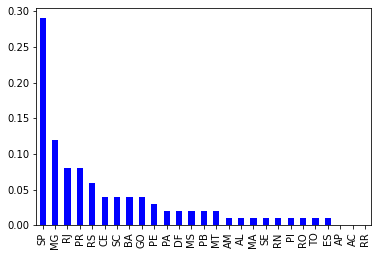

In [ ]:
(dados['SG_UF_NOT'].fillna(0).value_counts()/n).round(2).plot(kind = 'bar', 
                                                                                 color = ['blue']);

###### Como está o cenário de evolução do doença?

.groupby() do pandas é usado para agrupar dados e isso será perfeiro para filtrar determinadas variáveis.

In [ ]:
(dados['EVOLUCAO'].fillna(0).value_counts()/n).round(2) 

Cura                       0.54
Óbito                      0.25
0                          0.16
Ignorado                   0.03
Óbito por outras causas    0.01
Name: EVOLUCAO, dtype: float64

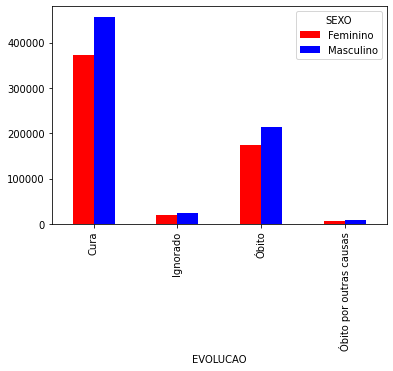

In [ ]:
dados.groupby(['SEXO', 'EVOLUCAO']).count()['índice'].unstack().T.plot(kind = 'bar', 
                                                                                 color = ['red', 'blue']);

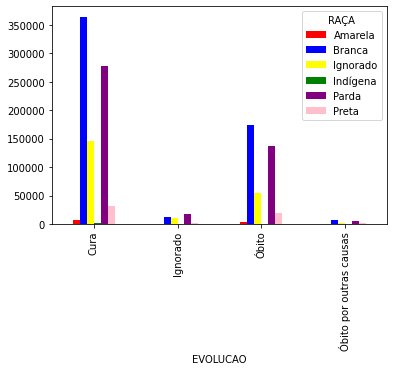

In [ ]:
dados.groupby(['RAÇA', 'EVOLUCAO']).count()['índice'].unstack().T.plot(kind = 'bar', 
                                                                                 color = ['red', 'blue', 'yellow', 'green', 'purple', 'pink']);

######Há desigualdade em relação ao gênero nos casos de SRAG?

In [ ]:
(dados['SEXO'].fillna(0).value_counts()/n).round(2) 

Masculino    0.55
Feminino     0.45
0            0.00
Name: SEXO, dtype: float64

In [ ]:
(dados.groupby(['SEXO', 'idade']).count()['índice']/n).round(2).sort_values(ascending = False).unstack()

idade,"[0,5]","[6,11]","[12,17]","[18,24]","[25,30]","[31,40]","[41,50]","[51,60]",[61-70],"[71,80]","[81,90]",[91-100]
SEXO,,,,,,,,,,,,
Feminino,0.02,0.01,0.0,0.01,0.02,0.05,0.06,0.09,0.08,0.06,0.04,0.01
Masculino,0.02,0.01,0.0,0.01,0.02,0.07,0.10,0.11,0.09,0.07,0.04,0.01


In [ ]:
dados.groupby(['SEXO', 'RAÇA']).count()['índice'].unstack().T

SEXO,Feminino,Masculino
RAÇA,,
Amarela,6147,7894
Branca,294152,348078
Ignorado,117455,148871
Indígena,1061,1267
Parda,239900,296114
Preta,28739,35696


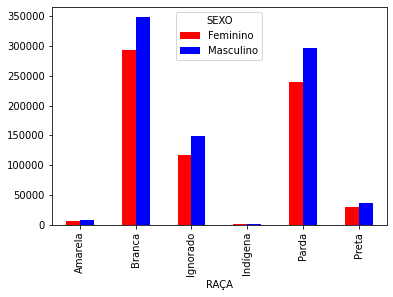

In [ ]:
dados.groupby(['SEXO', 'RAÇA']).count()['índice'].unstack().T.plot(kind = 'bar', 
                                                                                 color = ['red', 'blue']);

In [ ]:
dados.groupby(['SEXO', 'ESCOLARIDADE']).count()['índice'].unstack().T

SEXO,Feminino,Masculino
ESCOLARIDADE,,
Fundamental 1º ciclo (1ª a 5ª série),65045,71619
Fundamental 2º ciclo (6ª a 9ª série),42513,51979
Ignorado,202394,244480
Médio (1º ao 3º ano),68486,93834
Não se aplica,16029,20076
Sem escolaridade/Analfabeto,20256,20099
Superior,27595,40023


In [ ]:
(dados['ESCOLARIDADE'].fillna(0).value_counts()/n).round(2) 

0                                       0.35
Ignorado                                0.29
Médio (1º ao 3º ano)                    0.11
Fundamental 1º ciclo (1ª a 5ª série)    0.09
Fundamental 2º ciclo (6ª a 9ª série)    0.06
Superior                                0.04
Sem escolaridade/Analfabeto             0.03
Não se aplica                           0.02
Name: ESCOLARIDADE, dtype: float64

######Qual o número de internações?

In [ ]:
(dados['UTI'].fillna(0).value_counts()/n).round(2)

Não         0.55
Sim         0.29
0           0.14
Ignorado    0.02
Name: UTI, dtype: float64

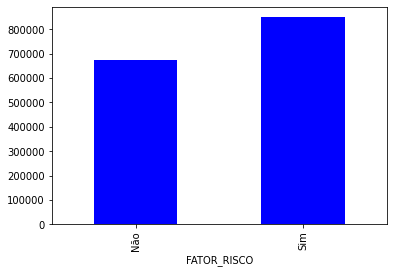

In [ ]:
dados.groupby('FATOR_RISCO').count()['índice'].plot(kind = 'bar', 
                                                                                 color = ['blue']);

In [ ]:
(dados.groupby(['SEXO', 'UTI']).count()['índice']/n).round(2).sort_values(ascending = False).unstack()

UTI,Ignorado,Não,Sim
SEXO,,,
Feminino,0.01,0.25,0.13
Masculino,0.01,0.30,0.16


In [ ]:
(dados.groupby(['idade', 'UTI']).count()['índice']/n).round(2).sort_values(ascending = False).unstack()

UTI,Ignorado,Não,Sim
idade,,,
"[0,5]",0.0,0.03,0.01
"[6,11]",0.0,0.01,0.00
"[12,17]",0.0,0.00,0.00
"[18,24]",0.0,0.01,0.00
"[25,30]",0.0,0.02,0.01
"[31,40]",0.0,0.07,0.03
"[41,50]",0.0,0.09,0.04
"[51,60]",0.0,0.11,0.06
[61-70],0.0,0.09,0.06


######Qual o diagnótico final de SRAG?

In [ ]:
#classificação final do caso de SRAG
lista = ['SRAG por influenza', 'SRAG por outro vírus respiratório', 'SRAG não especificado', 'SRAG por covid-19', 'SRAG por outro vírus respiratório']

clas_fin = dados[dados['CLASSI_FINAL'].isin(lista)]

SRAGi = dados[dados['CLASSI_FINAL'] == 'SRAG por influenza'] 
SRAGvr = dados[dados['CLASSI_FINAL'] == 'SRAG por outro vírus respiratório'] 
SRAGne = dados[dados['CLASSI_FINAL'] == 'SRAG não especificado'] 
SRAGcov = dados[dados['CLASSI_FINAL'] == 'SRAG por covid-19'] 
SRAGve = dados[dados['CLASSI_FINAL'] == 'SRAG por outro vírus respiratório'] 

In [ ]:
clas_fin.groupby('CLASSI_FINAL').count()['índice']

CLASSI_FINAL
SRAG não especificado                 266569
SRAG por covid-19                    1100954
SRAG por influenza                      1004
SRAG por outro vírus respiratório      11391
Name: índice, dtype: int64

In [ ]:
clas_fin.groupby(['CLASSI_FINAL', 'EVOLUCAO']).count()['índice'].unstack()

EVOLUCAO,Cura,Ignorado,Óbito,Óbito por outras causas
CLASSI_FINAL,,,,
SRAG não especificado,175575,13726,39557,12442
SRAG por covid-19,640388,28532,345098,1890
SRAG por influenza,685,50,149,10
SRAG por outro vírus respiratório,9852,177,359,68


In [ ]:
(SRAGcov.groupby(['EVOLUCAO']).count()['índice']/n).round(2)

EVOLUCAO
Cura                       0.42
Ignorado                   0.02
Óbito                      0.23
Óbito por outras causas    0.00
Name: índice, dtype: float64

In [ ]:
clas_fin.groupby(['CLASSI_FINAL', 'idade']).count()['índice'].unstack()

idade,"[0,5]","[6,11]","[12,17]","[18,24]","[25,30]","[31,40]","[41,50]","[51,60]",[61-70],"[71,80]","[81,90]",[91-100]
CLASSI_FINAL,,,,,,,,,,,,
SRAG não especificado,37802,16191,3773,8583,8450,18670,23344,31324,38946,38926,29776,8256
SRAG por covid-19,7425,3927,2892,18071,38950,140001,200309,240976,206029,146737,77852,16659
SRAG por influenza,106,46,9,20,36,111,149,162,137,125,81,20
SRAG por outro vírus respiratório,7280,2185,230,253,125,152,140,196,222,256,181,54


In [ ]:
clas_fin.groupby(['CLASSI_FINAL', 'OBESIDADE']).count()['índice'].unstack()


OBESIDADE,1.0,2.0,9.0
CLASSI_FINAL,,,
SRAG não especificado,11396,82969,2445
SRAG por covid-19,105350,295113,9388
SRAG por influenza,46,187,7
SRAG por outro vírus respiratório,111,1938,44


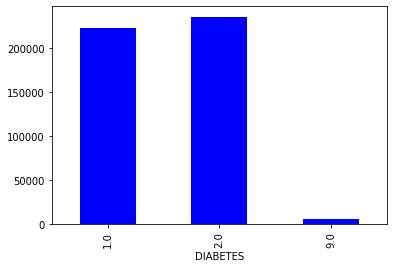

In [ ]:
SRAGcov.groupby(['DIABETES']).count()['índice'].plot(kind = 'bar', 
                                                                                 color = ['blue']);

###### Qual o cenário de sintomas e comorbidades em relação às diferentes classificações de SRAG?

Para responder essas perguntas iremos usar o RegEx, ou Expressão Regular,  que é uma sequência de caracteres que forma um padrão de pesquisa. O RegEx pode ser usado para verificar se uma string contém o padrão de pesquisa especificado.

In [ ]:
dados.filter(regex = 'S1').fillna(0).mean('S1'== 1).sort_values(ascending = False)

('S1', 'DISPINEIA')    0.696835
('S1', 'TOSSE')        0.666887
('S1', 'FEBRE')        0.521918
('S1', 'FADIGA')       0.249219
('S1', 'GARGANTA')     0.161664
('S1', 'DIARREIA')     0.122937
('S1', 'PERD_PALA')    0.087061
('S1', 'VOMITO')       0.085967
('S1', 'PERD_OLFT')    0.085369
('S1', 'DOR_ABD')      0.061538
dtype: float64

In [ ]:
aux1 = SRAGi.filter(regex = 'S1').sum('S1' == 1).sort_values(ascending = False)/n
aux2 = SRAGvr.filter(regex = 'S1').sum('S1' == 1).sort_values(ascending = False)/n
aux3 = SRAGne.filter(regex = 'S1').sum('S1' == 1).sort_values(ascending = False)/n
aux4 = SRAGcov.filter(regex = 'S1').sum('S1' == 1).sort_values(ascending = False)/n
aux5 = SRAGve.filter(regex = 'S1').sum('S1' == 1).sort_values(ascending = False)/n

aux = pd.concat([aux1, aux2, aux3, aux4, aux5], axis = 1)
aux.columns = lista

aux.sort_values(by = 'SRAG por influenza', ascending = False)

,SRAG por influenza,SRAG por outro vírus respiratório,SRAG não especificado,SRAG por covid-19,SRAG por outro vírus respiratório
"('S1', 'TOSSE')",0.000459,0.006315,0.102579,0.495128,0.006315
"('S1', 'DISPINEIA')",0.000426,0.004854,0.110185,0.521558,0.004854
"('S1', 'FEBRE')",0.000367,0.004152,0.074576,0.395714,0.004152
"('S1', 'FADIGA')",0.000141,0.000897,0.031661,0.198284,0.000897
"('S1', 'GARGANTA')",0.000121,0.000559,0.020098,0.126235,0.000559
"('S1', 'DIARREIA')",0.000073,0.000649,0.017085,0.095308,0.000649
"('S1', 'PERD_PALA')",0.000062,0.000083,0.005486,0.075589,0.000083
"('S1', 'PERD_OLFT')",0.000059,0.000092,0.005422,0.074070,0.000092
"('S1', 'VOMITO')",0.000058,0.000989,0.018769,0.058164,0.000989
"('S1', 'DOR_ABD')",0.000036,0.000228,0.011773,0.044141,0.000228


In [ ]:
#criando conjuntos de dados convenientes através de alguns filtros

#classificação final do caso de SRAG
lista = ['SRAG por influenza', 'SRAG por outro vírus respiratório', 'SRAG não especificado', 'SRAG por covid-19']

clas_fin = dados[dados['CLASSI_FINAL'].isin(lista)]

SRAGi = dados[dados['CLASSI_FINAL'] == 'SRAG por influenza'] 
SRAGvr = dados[dados['CLASSI_FINAL'] == 'SRAG por outro vírus respiratório'] 
SRAGne = dados[dados['CLASSI_FINAL'] == 'SRAG não especificado'] 
SRAGcov = dados[dados['CLASSI_FINAL'] == 'SRAG por covid-19'] 

aux1 = SRAGi.filter(regex = 'C1').sum('S1' == 1).sort_values(ascending = False)/n
aux2 = SRAGvr.filter(regex = 'C1').sum('S1' == 1).sort_values(ascending = False)/n
aux3 = SRAGne.filter(regex = 'C1').sum('S1' == 1).sort_values(ascending = False)/n
aux4 = SRAGcov.filter(regex = 'C1').sum('S1' == 1).sort_values(ascending = False)/n

aux = pd.concat([aux1, aux2, aux3, aux4], axis = 1)
aux.columns = lista

aux.sort_values(by = 'SRAG por influenza', ascending = False)

,SRAG por influenza,SRAG por outro vírus respiratório,SRAG não especificado,SRAG por covid-19
"('C1', 'CARDIPATIA')",0.000121,0.000409,0.045609,0.208345
"('C1', 'DIABETES')",0.000091,0.000211,0.029162,0.145871
"('C1', 'OBESIDADE')",0.000030,0.000074,0.007527,0.069257
"('C1', 'ASMA')",0.000020,0.000461,0.008819,0.016313
"('C1', 'NEUROLOGICO')",0.000020,0.000218,0.009506,0.018494
"('C1', 'IMUNODEPRESSAO')",0.000017,0.000128,0.006082,0.012157
"('C1', 'RENAL')",0.000016,0.000061,0.006385,0.018539
"('C1', 'PNEUMOPATIA')",0.000013,0.000193,0.009166,0.017024
"('C1', 'HEPATICA')",0.000005,0.000027,0.001867,0.004616
"('C1', 'SIND_DOWN')",0.000002,0.000052,0.000714,0.002147


######Como está os casos de SRAG em crianças até 5 anos?

In [ ]:
dados[dados['idade'] == '[0,5]']['CLASSI_FINAL'].value_counts()

SRAG não especificado                37802
SRAG por covid-19                     7425
SRAG por outro vírus respiratório     7280
SRAG por outro agente etiológico       364
SRAG por influenza                     106
Name: CLASSI_FINAL, dtype: int64

In [ ]:
dados[dados['idade'] == '[0,5]']['EVOLUCAO'].value_counts()

Cura                       44323
Ignorado                    2484
Óbito                        911
Óbito por outras causas      236
Name: EVOLUCAO, dtype: int64

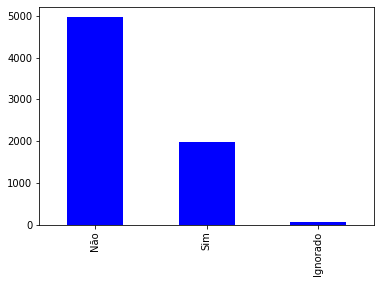

In [ ]:
SRAGvr[SRAGvr['idade'] == '[0,5]']['UTI'].value_counts().plot(kind = 'bar', 
                                                                                 color = ['blue']);